# HacksprintV3.0
### Team: Codeplay
### Team Members: Swetha ME, Raja V, Chandramouleesvar V

In [ ]:
#Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

In [ ]:
#Loading the Data in a DataFrame df
df = pd.read_csv("G:/HackSprint 3.0/dataset/crudeoil.csv")
dummy_df = pd.read_csv("G:/HackSprint 3.0/dataset/crudeoil.csv")

In [ ]:
#DateTime Conversion
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

dummy_df['Date'] = pd.to_datetime(dummy_df['Date'], format='%d-%m-%Y')
dummy_df['Day'] = dummy_df['Date'].dt.day
dummy_df['Month'] = dummy_df['Date'].dt.month
dummy_df['Year'] = dummy_df['Date'].dt.year

In [ ]:
#Dropping other Columns
df.drop(['Date','Adj Close'],axis=1,inplace=True)

In [ ]:
#Encoding the City Column
City_Enc = LabelEncoder()
label1 = City_Enc.fit_transform(df['City'])
df['City_Encoded'] = label1
df.drop('City', axis=1, inplace=True)

In [ ]:
drop_indices = np.random.choice(df.index, 500, replace=False)
df_subset = df.drop(drop_indices)

df_all = df.merge(df_subset.drop_duplicates(), 
                   how='left', indicator=True)

MainData, TestData = [x for _, x in df_all.groupby(df_all['_merge'] == 'left_only')]

In [ ]:
TestData.drop(['_merge'],axis=1,inplace=True)
MainData.drop(['_merge'],axis=1,inplace=True)
TestData.Close=np.nan

### Target Column & Train Test Split

In [8]:
y = pd.DataFrame(MainData['Close'])
MainData.drop(['Close'],axis=1,inplace=True)
X_train,X_test,y_train,y_test = train_test_split(MainData,y,test_size=0.25, random_state=0)

### K Folds Cross Validation Data Partition

In [9]:
kfolds = KFold(n_splits=10, random_state=0)

# Models

### Linear Regression

In [10]:
reg = linear_model.LinearRegression()
score = cross_val_score(reg, MainData, y, cv=kfolds)
print(max(score))

0.9990938433087785


In [11]:
reg_norm = linear_model.LinearRegression()
reg_norm.fit(X_train,y_train.values.ravel())
y_pred = reg_norm.predict(X_test)

mean_squared_error(y_test,y_pred,squared=False)

0.5865020219816026

In [12]:
r2_score(y_test, y_pred)

0.9994975528031

### Random Forest Regressor

In [13]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
score = cross_val_score(rfr, MainData, y, cv=kfolds)
print(max(score))

0.998821927792361


In [14]:
rfr_norm = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr_norm.fit(X_train,y_train.values.ravel())
y_pred = rfr_norm.predict(X_test)

mean_squared_error(y_test,y_pred,squared=False)

0.6931354643383337

In [15]:
r2_score(y_test, y_pred)

0.9992982415664818

### Decision Tree Regressor

In [16]:
dtr = DecisionTreeRegressor(random_state = 0)
score = cross_val_score(dtr, MainData, y, cv=kfolds)
print(max(score))

0.9976691576491904


In [17]:
dtr_norm = DecisionTreeRegressor(random_state = 0)
dtr_norm.fit(X_train,y_train.values.ravel())
y_pred = dtr_norm.predict(X_test)

mean_squared_error(y_test,y_pred,squared=False)

0.8732259626217737

In [18]:
r2_score(y_test, y_pred)

0.9988862064988491

### Predicting values on Test Data

In [19]:
TestData.drop(['Close'],axis=1,inplace=True)
y_pred = reg_norm.predict(TestData)
TestData['Predicted Close'] = y_pred.tolist()
TestData.head()

,Open,High,Low,Volume,Day,Month,Year,City_Encoded,Predicted Close
17,25.450001,25.799999,25.10,77397,14,4,2000,3,25.454266
31,26.799999,27.400000,26.76,50930,5,5,2000,5,27.110494
36,29.450001,30.000000,28.85,83212,12,5,2000,1,29.496526
47,30.010000,30.480000,29.98,48226,30,5,2000,3,30.315217
50,29.850000,30.750000,29.75,67232,2,6,2000,0,30.459071


## Analysis of the Data using Seaborn & Matplotlib

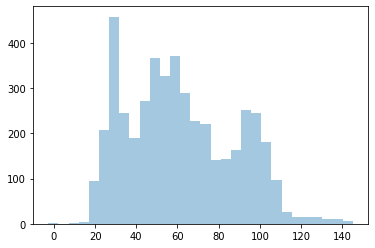

In [20]:
sns.distplot(y, kde=False)

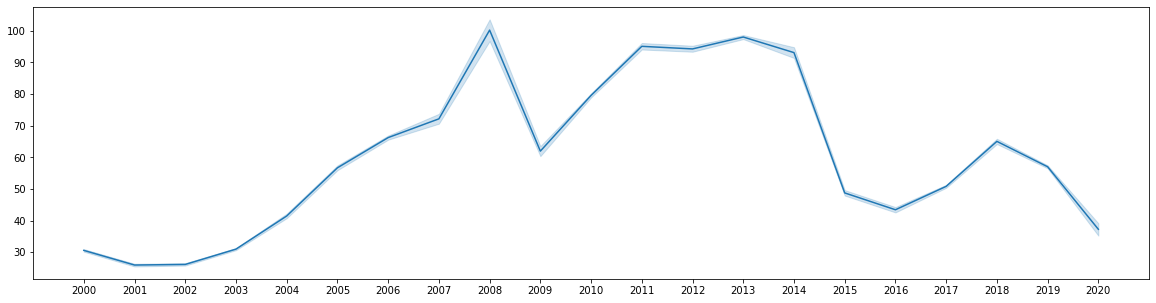

In [21]:
plt.figure(figsize=(20,5))
sns.lineplot(x=df['Year'].to_numpy(dtype=str),y=df["Close"].to_numpy(dtype=np.float64))

([<matplotlib.axis.XTick at 0x256a4474848>,
 <a list of 11 Text xticklabel objects>)

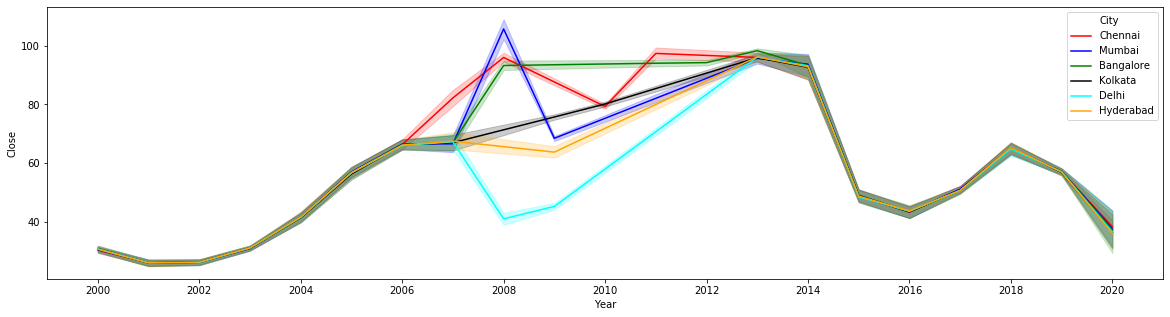

In [22]:
plt.figure(figsize=(20,5))
sns.lineplot(data=dummy_df, x="Year", y="Close", hue="City", palette=['red','blue','green','black','cyan','orange'])
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020])

## Exporting Data

In [23]:
Date_MainData = MainData[['Day','Month','Year']].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
Date_TestData = TestData[['Day','Month','Year']].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
FinalDate = np.concatenate((Date_MainData,Date_TestData))

MainData["FinalClose"] = y
MainData['FinalDate'] = Date_MainData
TestData['FinalDate'] = Date_TestData

OutputDataSet = np.concatenate((MainData,TestData))
OutputDataFrame = pd.DataFrame(OutputDataSet)
OutputDataFrame.drop([0,1,2,3,4,5,6,7],axis=1,inplace=True)
OutputDataFrame["Close Price"] = OutputDataFrame[8]
OutputDataFrame["Date"] = OutputDataFrame[9]
OutputDataFrame.drop([8,9],axis=1,inplace=True)

In [24]:
OutputDataFrame.to_csv('OutputDataFrame.csv')

## Tkinter UI

In [26]:
# on Button click reading and displaying date selection
from tkinter import *
from tkcalendar import DateEntry 
import pandas as pd
import numpy as np
from datetime import datetime 


my_w = Tk()
my_w.geometry("770x433")
my_w.title("Hacksprint") 

img = PhotoImage(file="G:/HackSprint 3.0/background.png")
label = Label(
    my_w,
    image=img
)
label.place(x=-2, y=0)
Label(my_w,text= "Commodity Price Prediction",font=('Calibri',20)).place(x=235,y=0)
Label(my_w,text= "Crude Oil",font=('Calibri',15)).place(x=340,y=70)

Label(my_w, text= "Choose a Date",font=('Calibri',13), background= 'gray61', foreground="white").place(x=245,y=145)
cal=DateEntry(my_w,selectmode='day',font=('Calibri',13),date_pattern='dd-mm-YYYY',width= 16, background= "magenta3", foreground= "white",bd=2)
cal.place(x=365,y=145)

def my_upd(): # triggered on Button Click
    dt=cal.get_date()
    selected_date=dt.strftime("%d-%m-%Y") #format to change     
    l1.config(text=selected_date) # read and display date
   
    dataframe = pd.read_csv("C:/Users/Chandramouleesvar V/Hacksprint/OutputDataFrame.csv")
    
    for i in range(len(dataframe['Date'])): 
        new_date = datetime.strptime(dataframe['Date'][i], '%d-%m-%Y')
        new_date=str(new_date)[:10]
        new_date=new_date.split('-')
        new_date.reverse()
        new_date='-'.join(new_date)       
        
        
        if selected_date == new_date:
            print(selected_date,new_date)
            l2.config(text=dataframe['Close Price'][i])            
            break

        else: 
            l2.config(text='Data Unavailable')
            
            



b1=Button(my_w,text='Get Price',font=('Calibri',12), command=lambda:my_upd())
b1.place(x=260,y=190)

l1=Label(my_w,text='                   ',font=('Calibri',13))  # Label to display date 
l1.place(x=400,y=190)

Label(my_w,text='Closing Price',font=('Calibri',13),background= 'gray61', foreground="white").place(x=250,y=245)
l2=Label(my_w,text='               ',font=('Calibri',13))
l2.place(x=410,y=245)


Label(my_w,text=' CodePlay ',font=('Calibri',15)).place(x=670,y=395)
my_w.mainloop()



04-04-2000 04-04-2000
22-03-2000 22-03-2000
